In [8]:
!pip install kagglehub
!pip freeze > requirements.txt

In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iarunava/cell-images-for-detecting-malaria")

print("Path to dataset files:", path)

Path to dataset files: /Users/eliahsand/.cache/kagglehub/datasets/iarunava/cell-images-for-detecting-malaria/versions/1


## Imports


In [10]:
# Deep learning libraries
!pip install tensorflow

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#image and file handling libraries
import os
import pathlib as Path
from PIL import Image
import numpy as np
import random


## System check:

In [11]:
print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.19.0
GPU available: []


## Dataset preparation and preloading

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from pathlib import Path

# Base path from kagglehub
base_dir = Path(path) / "cell_images"
img_size = (64, 64)
batch_size = 32

# Create one generator instance for both train and val
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # reserve 20% for validation
)

# Train split
train_gen = datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True,
    seed=42
)

# Validation split
val_gen = datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=True,
    seed=42
)

Found 44095 images belonging to 3 classes.
Found 11021 images belonging to 3 classes.


Visualize Class Distribution

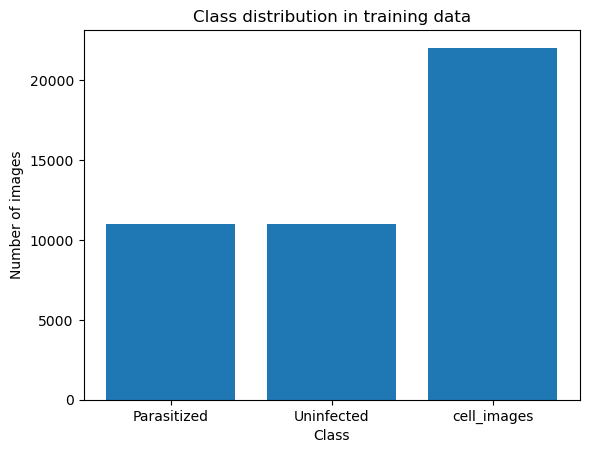

In [13]:
# Get label names from the generator
class_labels = list(train_gen.class_indices.keys())
labels, counts = np.unique(train_gen.classes, return_counts=True)

# Plot
plt.bar(class_labels, counts)
plt.title("Class distribution in training data")
plt.xlabel("Class")
plt.ylabel("Number of images")
plt.show()

## Model definition 

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # binary classification
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compiling the model 

In [15]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

## Training the model

In [16]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 36s 26ms/step - accuracy: 0.2472 - loss: -1193402112.0000 - val_accuracy: 0.2500 - val_loss: -27498811392.0000
Epoch 2/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 36s 26ms/step - accuracy: 0.2512 - loss: -70643572736.0000 - val_accuracy: 0.2500 - val_loss: -311852793856.0000
Epoch 3/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 36s 26ms/step - accuracy: 0.2516 - loss: -487660781568.0000 - val_accuracy: 0.2500 - val_loss: -1164436701184.0000
Epoch 4/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 36s 26ms/step - accuracy: 0.2506 - loss: -1540495245312.0000 - val_accuracy: 0.2500 - val_loss: -2905977389056.0000
Epoch 5/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 36s 26ms/step - accuracy: 0.2467 - loss: -3707480047616.0000 - val_accuracy: 0.2500 - val_loss: -5819189428224.0000
Epoch 6/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 36s 26ms/step - accuracy: 0.2487 - loss: -7044014276608.0000 - val_accuracy: 0.2500 - val_loss: -10303674777600.0000
Epoch 7/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 36s 26ms/step - ac

## Results

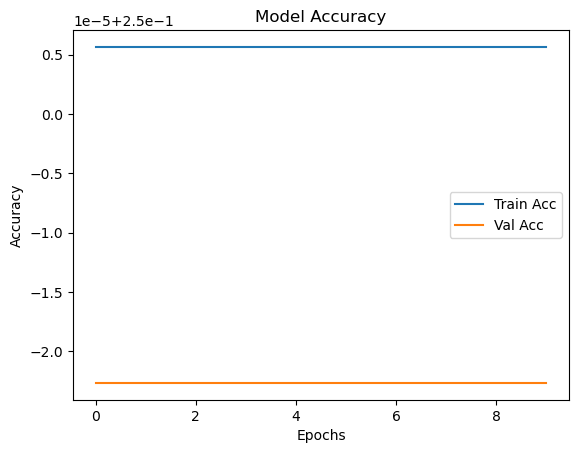

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()